<a href="https://colab.research.google.com/github/nualpair/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Multidimensional Scaling**

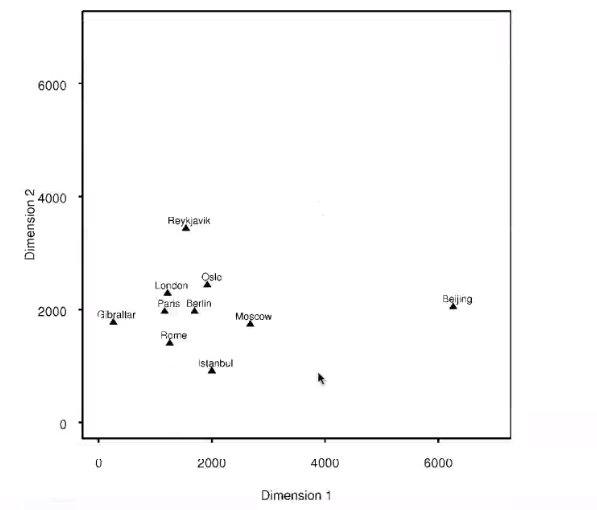

###**Example on Iris dataset**

In [1]:
import pandas as pd

In [2]:
example_df= pd.read_csv( 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


###**ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS**

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)

In [5]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1]) # record - แถว, dimention - หลัก

In [6]:
new_pca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [7]:
from matplotlib import pyplot as plt

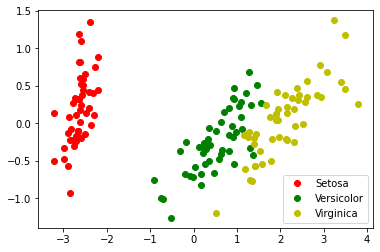

In [8]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend()

###**MDS (Multidimensional Scaling)**
Distance (ระยะห่าง)

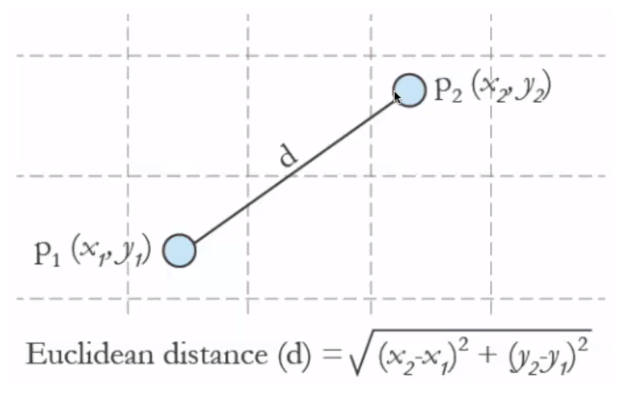

In [9]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [10]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [11]:
import numpy as np

In [12]:
dist = np.linalg.norm(X1-X2) # คำนวณแบบใช้สูตร
dist

0.5385164807134502

In [13]:
(0.04+0.25)**(0.5) # คำนวณแบบปกติ

0.5385164807134504

####**Distance Matrix**

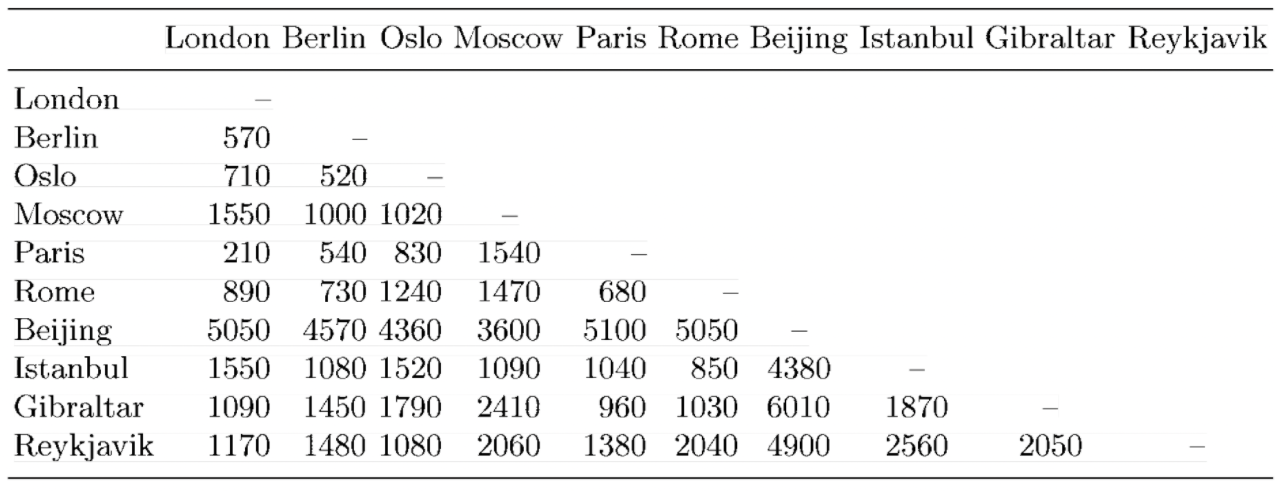

In [14]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

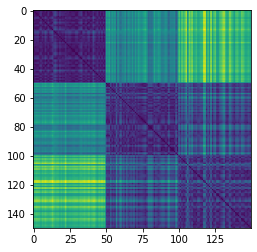

In [15]:
plt.imshow(dis_matrix)

###**ทำ MDS**

In [22]:
from sklearn.manifold import MDS

In [23]:
mds = MDS(n_components=2)

In [24]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

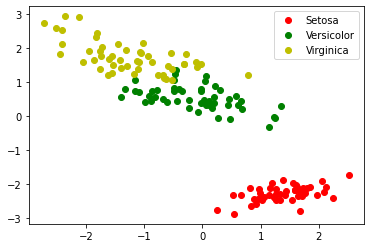

In [25]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

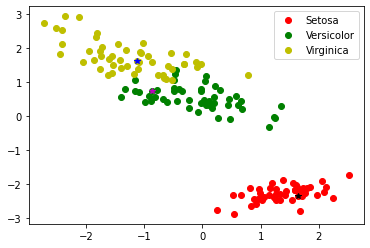

In [26]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k')
plt.plot(new_mds[56,0],new_mds[56,1],'*m')
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()

####**การใช้ Pre-computed Distance Matrix**

In [43]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock') ##‘cityblock’

In [44]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

In [47]:
new_mds2 = mds2.fit_transform(dis_matrix)

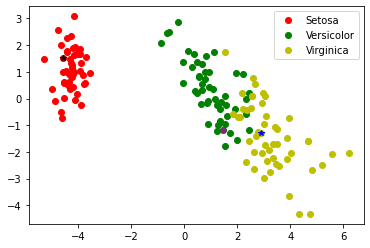

In [48]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1],'or',label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og',label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1],'oy',label='Virginica')
plt.plot(new_mds2[6,0],new_mds2[6,1],'*k')
plt.plot(new_mds2[56,0],new_mds2[56,1],'*m')
plt.plot(new_mds2[116,0],new_mds2[116,1],'*b')
plt.legend()